In [1]:
from os import getcwd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
path = getcwd().replace('Concepts', 'Dataset') + '/insurance.csv'

In [6]:
Obs = np.loadtxt(path, delimiter=',', skiprows=1, usecols=[1,2])

In [7]:
Obs.shape

(63, 2)

In [8]:
X, Y = Obs[:,0], Obs[:,1]

In [9]:
X.shape

(63,)

In [10]:
Y.shape

(63,)

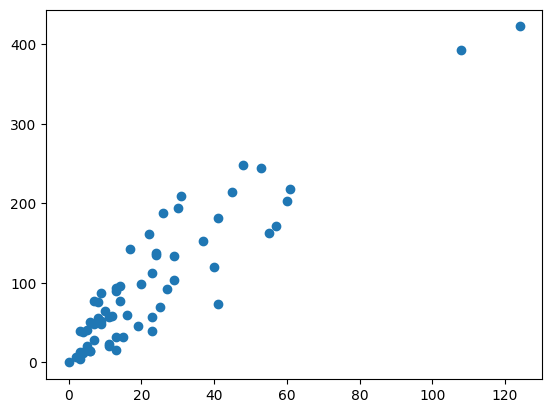

In [11]:
plt.scatter(X, Y)

**From the plot, we can see that difference between the scale of X and Y is around 80. It is better to standardised the scale using Z-score**

In [12]:
def scale(x: np.ndarray):
    return (x - np.mean(x)) / np.std(x)

In [13]:
X_scaled = scale(X)

In [14]:
Y_scaled = scale(Y)

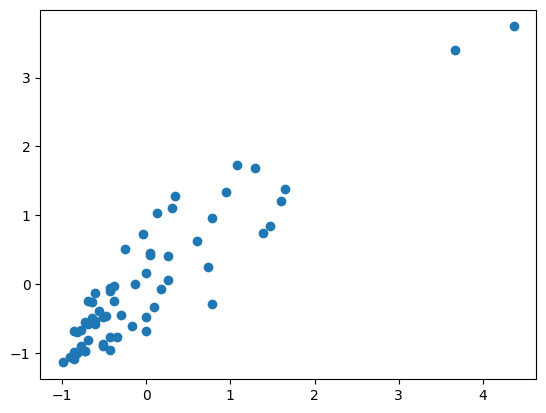

In [16]:
plt.scatter(X_scaled, Y_scaled)

*We can also use the sklearn's StandardScaler*

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
Obs_scaled = StandardScaler().fit_transform(Obs)

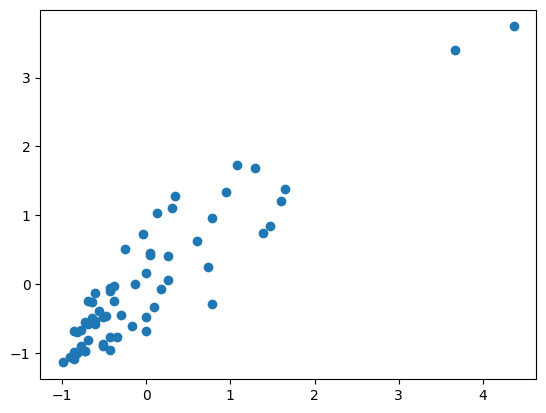

In [27]:
plt.scatter(Obs_scaled[:,0], Obs_scaled[:,1])

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression().fit(X_scaled.reshape(X_scaled.shape[0],1), Y_scaled)

In [20]:
model.coef_

array([0.91287824])

In [21]:
model.intercept_

-3.533195522741425e-17

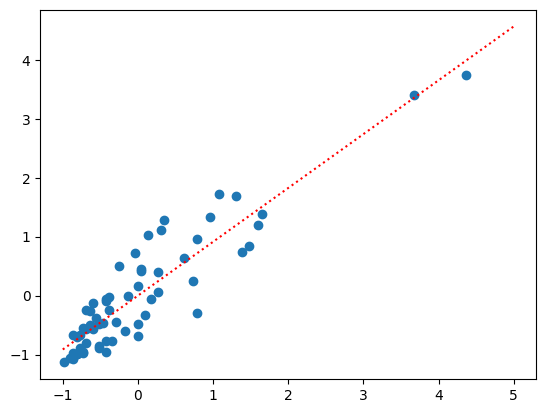

In [23]:
plt.scatter(X_scaled, Y_scaled)
plt.plot(range(-1,6), model.predict([np.array([x]) for x in range(-1, 6)]), 'r:')